## Luis Gustavo Peçanha NUSP: 9806763

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Exercício 1

In [2]:
#Leitura do conjunto de dados com erro
df_1 = pd.read_csv('data/iris-with-errors.csv')

In [3]:
# Subsitituindo todos os '?' no dataframe por nan
df_1 = df_1.replace('?', np.nan)

In [4]:
# Remove linhas com valores nan
df_1 = df_1.dropna()

In [5]:
# Remove linhas duplicadas
df_1 = df_1.drop_duplicates()

In [6]:
# Remove as últimas duas colunas
df_1 = df_1.drop(df_1.columns[-2:], axis=1)

In [7]:
df_1.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5


# Exercício 2

In [8]:
#Leitura do conjunto de dados com erro
df_2 = pd.read_csv('data/iris-with-errors.csv')

In [9]:
# Subsitituindo todos os '?' no dataframe por nan
df_2 = df_2.replace('?', np.nan)

In [10]:
# Remove linhas duplicadas
df_2 = df_2.drop_duplicates()

In [11]:
# Arrumando tipo de dados das colunas
columns = list(df_2.iloc[:, :-1].columns)   # iloc para escolher as 4 primeiras colunas (excluindo a de string)

for col in columns:
    df_2[col] = df_2[col].apply('float64')

In [12]:
# Insere a mediana de cada coluna onde há nan

df_2[columns] = df_2[columns].apply(lambda x: x.fillna(x.median()), axis=0)

In [13]:
df_2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,5.0,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5.0,3.1,1.5,0.2,setosa
6,5.0,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,0.2,setosa
10,5.0,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa


# Exercício 3

In [14]:
# Leitura dos dados
df_3 = pd.read_csv('data/iris.csv')

In [15]:
# Desconsiderando a classe
df_3 = df_3.iloc[:, :-1]

In [16]:
# Obtém mínimo e máximo de cada atributo
for col in df_3.columns:
    print("Maior valor da coluna:{} : {}".format(col, df_3[col].max()))
    print("Menor valor da coluna:{} : {}".format(col, df_3[col].min()))

Maior valor da coluna:sepal_length : 7.9
Menor valor da coluna:sepal_length : 4.3
Maior valor da coluna:sepal_width : 4.4
Menor valor da coluna:sepal_width : 2.0
Maior valor da coluna:petal_length : 6.9
Menor valor da coluna:petal_length : 1.0
Maior valor da coluna:petal_width : 2.5
Menor valor da coluna:petal_width : 0.1


## Normalização 

In [17]:
# Prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor
df_3_norm = scaler.fit_transform(df_3)

In [18]:
print(df_3_norm)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [19]:
print('Mínimo dos atributos:', np.amin(df_3_norm, axis=0))
print('Máximo dos atributos:', np.amax(df_3_norm, axis=0))

Mínimo dos atributos: [0. 0. 0. 0.]
Máximo dos atributos: [1. 1. 1. 1.]


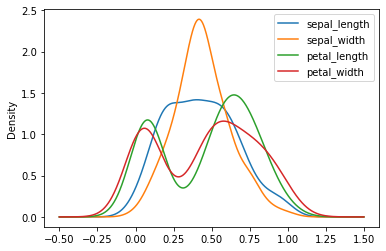

In [20]:
# Atribui cada coluna do vetor normalizado na respectiva coluna do dataframe 'aux' (cópia de df_3)
aux = df_3.copy()
for i in range(0, 4):
    aux.iloc[:, i] = df_3_norm[:, i]
# Plota o gráfico de cada atributo normalizado
aux.plot.kde()

## Padronização

In [21]:
# Prepara a função para transformar os dados
scaler = StandardScaler().fit(df_3)
# Realiza a padronização (média=0, variância = 1)
df_3_rescaled = scaler.transform(df_3)
print(df_3_rescaled)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

Média da coluna sepal_length é igual a: -4.736951571734001e-16
Desvio padrão da coluna sepal_length é igual a: 1.0
Média da coluna sepal_width é igual a: -6.631732200427602e-16
Desvio padrão da coluna sepal_width é igual a: 0.9999999999999999
Média da coluna petal_length é igual a: 3.315866100213801e-16
Desvio padrão da coluna petal_length é igual a: 0.9999999999999998
Média da coluna petal_width é igual a: -2.842170943040401e-16
Desvio padrão da coluna petal_width é igual a: 1.0


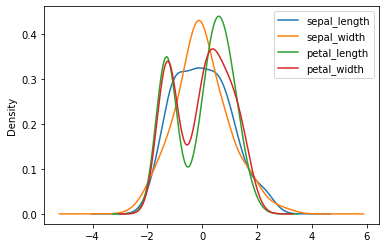

In [22]:
aux = df_3.copy()
for i in range(0, 4):
    print('Média da coluna {} é igual a: {}'.format(list(df_3.columns)[i], np.mean(df_3_rescaled[:, i])))
    print('Desvio padrão da coluna {} é igual a: {}'.format(list(df_3.columns)[i], np.std(df_3_rescaled[:, i])))
    aux.iloc[:, i] = df_3_rescaled[:, i]
# Plota o gráfico de cada atributo padronizado
aux.plot.kde()

# Exercício 4

In [23]:
df_4 = pd.read_csv('data/iris.csv')

In [24]:
# Obtendo a coluna de classes
classes = df_4.iloc[:, -1]
print(classes)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [25]:
N = 10
cl = classes.unique()   # Classes
X = np.array(df_4)
Xnew = []
cls = np.array(df_4.iloc[:, -1])
for i in range(0, len(cl)):
    a = np.argwhere(cls == cl[i])
    inds = np.random.choice(a[:, 0], N, replace=False)  # Seleciona os índices nos dados de forma aleatória
    Xnew.append(X[inds, :])
Xnew = np.array(Xnew)
print('Dados obtidos a partir da amostragem:')
print(Xnew)

Dados obtidos a partir da amostragem:
[[[4.8 3.4 1.9 0.2 'setosa']
  [4.6 3.6 1.0 0.2 'setosa']
  [4.6 3.4 1.4 0.3 'setosa']
  [5.1 3.8 1.9 0.4 'setosa']
  [5.7 4.4 1.5 0.4 'setosa']
  [5.1 3.8 1.5 0.3 'setosa']
  [4.7 3.2 1.6 0.2 'setosa']
  [5.4 3.4 1.7 0.2 'setosa']
  [5.0 3.5 1.3 0.3 'setosa']
  [4.9 3.0 1.4 0.2 'setosa']]

 [[5.6 2.9 3.6 1.3 'versicolor']
  [5.7 2.8 4.1 1.3 'versicolor']
  [5.6 2.5 3.9 1.1 'versicolor']
  [6.6 2.9 4.6 1.3 'versicolor']
  [5.9 3.0 4.2 1.5 'versicolor']
  [5.7 2.8 4.5 1.3 'versicolor']
  [5.6 3.0 4.5 1.5 'versicolor']
  [5.8 2.6 4.0 1.2 'versicolor']
  [6.1 2.8 4.0 1.3 'versicolor']
  [6.3 2.3 4.4 1.3 'versicolor']]

 [[6.2 2.8 4.8 1.8 'virginica']
  [6.3 2.5 5.0 1.9 'virginica']
  [5.6 2.8 4.9 2.0 'virginica']
  [6.3 2.7 4.9 1.8 'virginica']
  [5.7 2.5 5.0 2.0 'virginica']
  [6.4 2.7 5.3 1.9 'virginica']
  [6.4 3.1 5.5 1.8 'virginica']
  [6.1 2.6 5.6 1.4 'virginica']
  [7.7 2.6 6.9 2.3 'virginica']
  [6.0 2.2 5.0 1.5 'virginica']]]


# Exercício 5

In [26]:
df_5 = pd.read_csv('data/iris.csv')

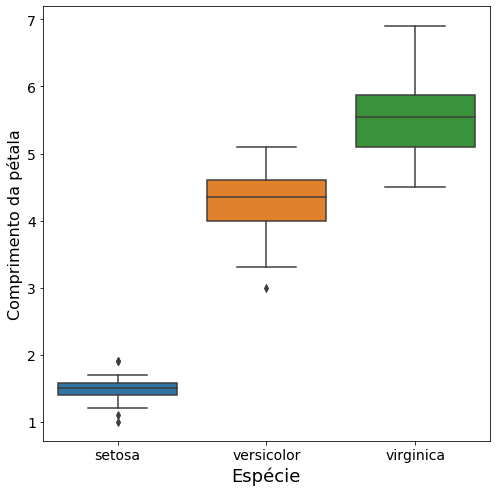

In [27]:
plt.figure(figsize=(8, 8))
# mostra o boxplot
sns.boxplot(x="species", y="petal_length", data=df_5)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

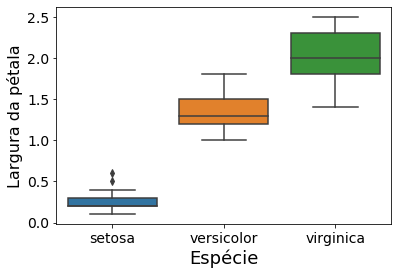

In [28]:
sns.boxplot(x="species", y="petal_width", data=df_5)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

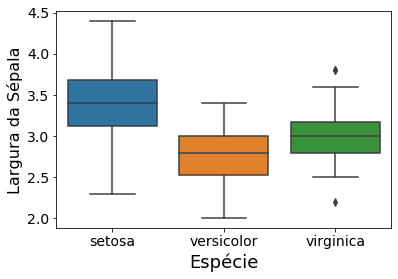

In [29]:
sns.boxplot(x="species", y="sepal_width", data=df_5)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da Sépala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

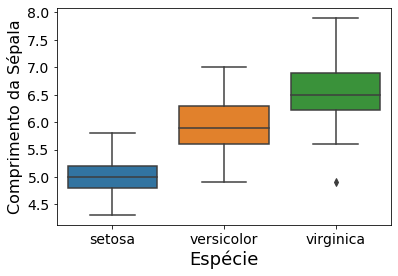

In [30]:
sns.boxplot(x="species", y="sepal_length", data=df_5)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da Sépala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

# Exercício 6

## Outliers da Iris

In [31]:
df_6 = pd.read_csv('data/iris.csv')

In [32]:
Q1 = df_6.quantile(0.25)
Q3 = df_6.quantile(0.75)
IQR = Q3 - Q1
outliers_iris = ((df_6 < (Q1 - 1.5 * IQR)) | (df_6 > (Q3 + 1.5 * IQR))).any(axis=1)#~is used to invert the answer
# Obtem o indice dos outliers e coloca numa lista
list_outliers_iris = []
for index, outlier in enumerate(outliers_iris):
    if outlier == True:
        list_outliers_iris.append(index)
df_6 = df_6.loc[df_6.index.isin(list_outliers_iris)]    # Mantém apenas os outliers
print(df_6) #Exibe os outliers

sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


## Outliers BostonHouse

In [33]:
df_7 = pd.read_csv('data/BostonHousing.csv')

In [34]:
Q1 = df_7.quantile(0.25)
Q3 = df_7.quantile(0.75)
IQR = Q3 - Q1
outliers_boston = ((df_7 < (Q1 - 1.5 * IQR)) | (df_7 > (Q3 + 1.5 * IQR))).any(axis=1)#~is used to invert the answer
# Obtem o indice dos outliers e coloca numa lista
list_outliers_boston = []
for index, outlier in enumerate(outliers_boston):
    if outlier == True:
        list_outliers_boston.append(index)
df_7 = df_7.loc[df_7.index.isin(list_outliers_boston)]    # Mantém apenas os outliers
print(df_7) #Exibe os outliers

crim   zn  indus  chas    nox     rm   age     dis  rad  tax  \
18    0.80271  0.0   8.14     0  0.538  5.456  36.6  3.7965    4  307   
25    0.84054  0.0   8.14     0  0.538  5.599  85.7  4.4546    4  307   
27    0.95577  0.0   8.14     0  0.538  6.047  88.8  4.4534    4  307   
32    1.38799  0.0   8.14     0  0.538  5.950  82.0  3.9900    4  307   
34    1.61282  0.0   8.14     0  0.538  6.096  96.9  3.7598    4  307   
..        ...  ...    ...   ...    ...    ...   ...     ...  ...  ...   
477  15.02340  0.0  18.10     0  0.614  5.304  97.3  2.1007   24  666   
478  10.23300  0.0  18.10     0  0.614  6.185  96.7  2.1705   24  666   
479  14.33370  0.0  18.10     0  0.614  6.229  88.0  1.9512   24  666   
489   0.18337  0.0  27.74     0  0.609  5.414  98.3  1.7554    4  711   
490   0.20746  0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711   

     ptratio       b  lstat  medv  
18      21.0  288.99  11.69  20.2  
25      21.0  303.42  16.51  13.9  
27      21.0  306.38  17